# Delivery Time Dataset 
**Predict delivery time using sorting time**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams["figure.figsize"] = (6,3)
plt.rcParams["figure.dpi"] = 130

In [3]:
dt = pd.read_csv("delivery_time.csv")
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dt.rename(columns={"Delivery Time":"Delivery_time",
                  "Sorting Time": "Sorting_time"}, inplace=True)
dt.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
dt.describe()

,Delivery_time,Sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
dt.isna().sum()

Delivery_time    0
Sorting_time     0
dtype: int64

In [7]:
dt.duplicated().sum()

0

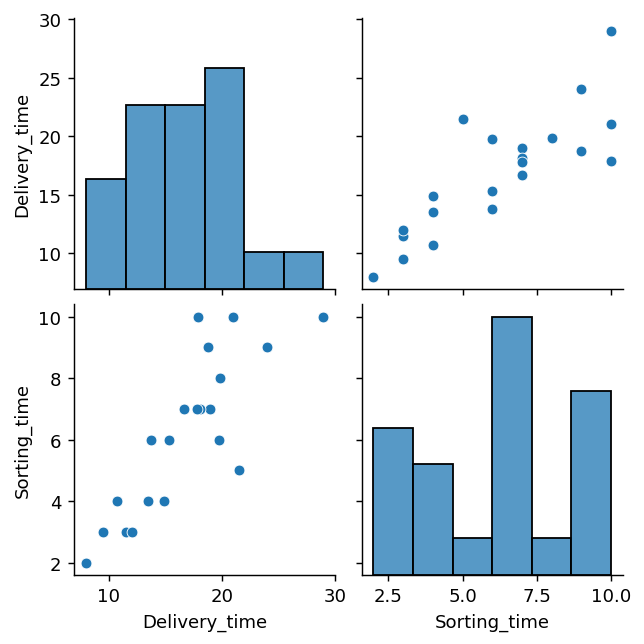

In [8]:
sns.pairplot(dt)

<AxesSubplot:xlabel='Sorting_time', ylabel='Density'>

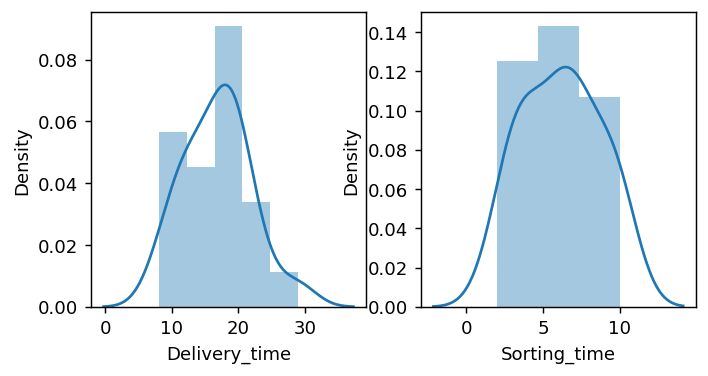

In [10]:
plt.subplot(1,2,1)
sns.distplot(dt["Delivery_time"])

plt.subplot(1,2,2)
sns.distplot(dt["Sorting_time"])

<AxesSubplot:>

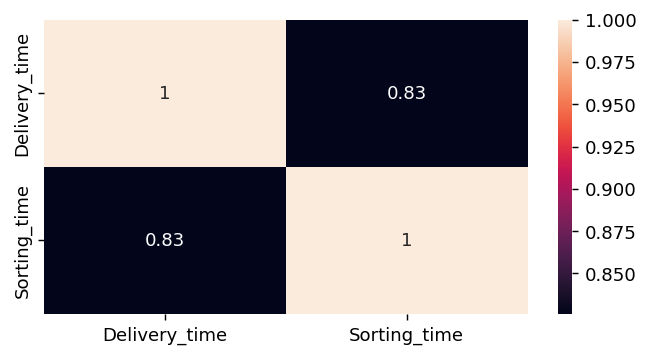

In [11]:
sns.heatmap(dt.corr(), annot=True)

# Transformation 

<AxesSubplot:xlabel='log_sorting_time', ylabel='Density'>

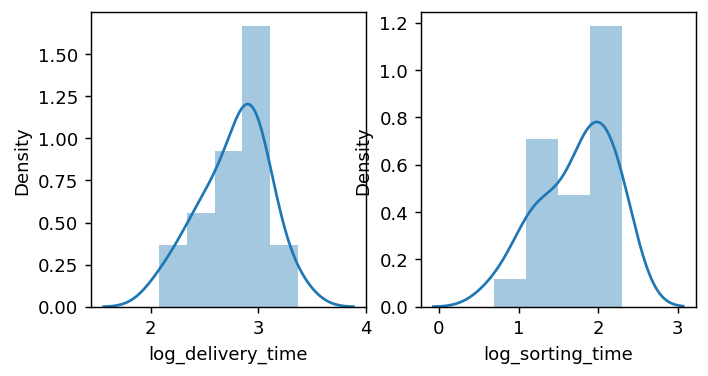

In [12]:
# Log Transformation

dt["log_delivery_time"] = np.log(dt["Delivery_time"])
dt["log_sorting_time"] = np.log(dt["Sorting_time"])

plt.subplot(1,2,1)
sns.distplot(dt["log_delivery_time"])

plt.subplot(1,2,2)
sns.distplot(dt["log_sorting_time"])

<AxesSubplot:xlabel='sqrt_sorting_time', ylabel='Density'>

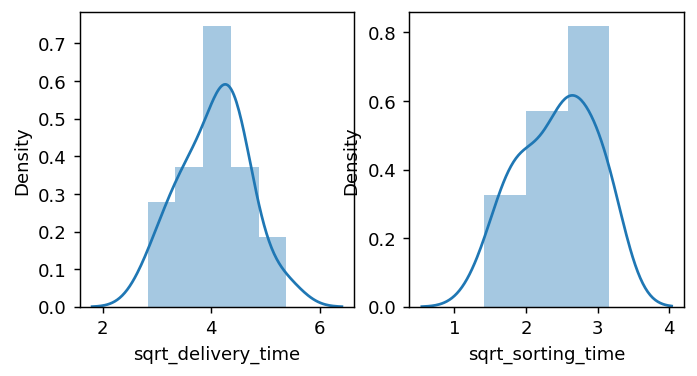

In [13]:
# sqrt Transformation

dt["sqrt_delivery_time"] = np.sqrt(dt["Delivery_time"])
dt["sqrt_sorting_time"] = np.sqrt(dt["Sorting_time"])

plt.subplot(1,2,1)
sns.distplot(dt["sqrt_delivery_time"])

plt.subplot(1,2,2)
sns.distplot(dt["sqrt_sorting_time"])

# Model Building 

In [14]:
# linear Regression through statsmodel
import statsmodels.formula.api as smf

### original data

In [15]:
model = smf.ols("Delivery_time~Sorting_time", data=dt).fit()

In [20]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [21]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### Log Transformed data

In [22]:
log_model = smf.ols("log_delivery_time~log_sorting_time", data=dt).fit()

In [23]:
log_model.params

Intercept           1.741987
log_sorting_time    0.597522
dtype: float64

In [25]:
log_model.rsquared, log_model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

### sqrt Transformed data 

In [26]:
sqrt_model = smf.ols("sqrt_delivery_time~sqrt_sorting_time", data=dt).fit()

In [27]:
sqrt_model.params

Intercept            1.613479
sqrt_sorting_time    1.002217
dtype: float64

In [29]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

### simple Linear Regression using sklearn

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
x = np.array(dt['Sorting_time']).reshape((-1, 1))
y = dt["Delivery_time"]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [75]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [76]:
lr_model.coef_, lr_model.intercept_

(array([1.52971053]), 7.176184210526316)

In [77]:
y_hat = lr_model.predict(x_test)
y_hat

array([13.29502632, 19.41386842, 20.94357895, 10.23560526, 17.88415789])

In [78]:
mse = mean_squared_error(y_test,y_hat)
mse

3.4151904541551223

In [79]:
r2_score(y_test, y_hat)

0.881193344590806

Following are the 4 models:  
   
   1. Original Data: R-squared = 0.6822714748417231
   2. Log Transformed Data: R-squared = 0.77216134926874
   3. Sqrt Transformed Data: R-squared = 0.7292011987544664
   4. sklearn model: R-squared = 0.881193344590806
   
**Best model is Sklearn model**

# Salary Dataset
**Build a prediction model for Salary_hike**

In [80]:
sal = pd.read_csv('Salary_Data.csv')
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [81]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [82]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [83]:
sal.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [84]:
sal.duplicated().sum()

0

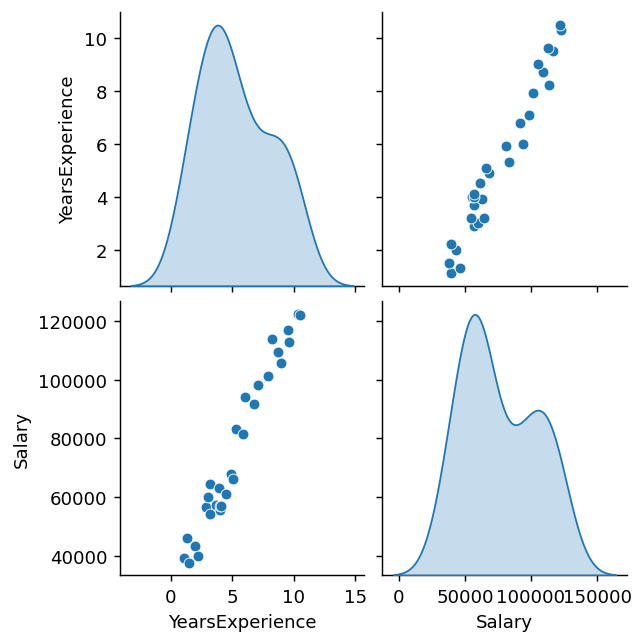

In [85]:
sns.pairplot(data = sal, diag_kind='kde')

<AxesSubplot:>

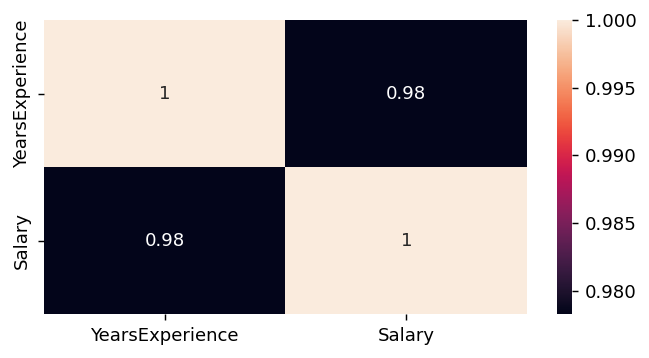

In [86]:
sns.heatmap(sal.corr(),annot=True)

# Transformation 

<AxesSubplot:xlabel='log_YearsExperience', ylabel='Density'>

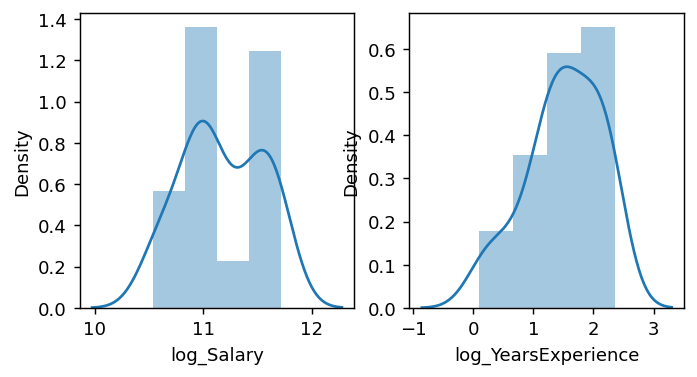

In [89]:
# Log Transformation

sal["log_Salary"] = np.log(sal["Salary"])
sal["log_YearsExperience"] = np.log(sal["YearsExperience"])

plt.subplot(1,2,1)
sns.distplot(sal["log_Salary"])

plt.subplot(1,2,2)
sns.distplot(sal["log_YearsExperience"])

<AxesSubplot:xlabel='sqrt_YearsExperience', ylabel='Density'>

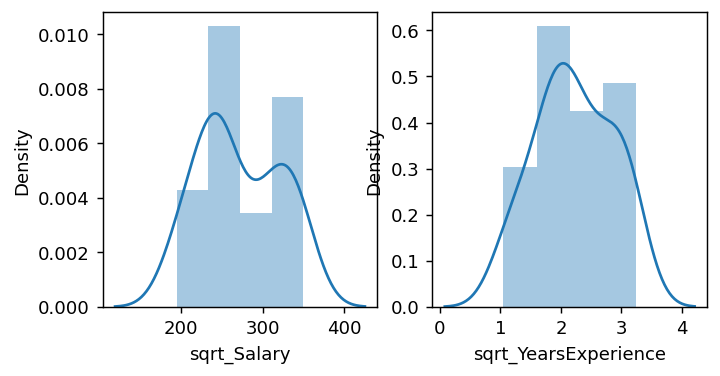

In [90]:
# sqrt Transformation

sal["sqrt_Salary"] = np.sqrt(sal["Salary"])
sal["sqrt_YearsExperience"] = np.sqrt(sal["YearsExperience"])

plt.subplot(1,2,1)
sns.distplot(sal["sqrt_Salary"])

plt.subplot(1,2,2)
sns.distplot(sal["sqrt_YearsExperience"])

# Model Building 

### original data 

In [91]:
# linear Regression through statsmodel
model = smf.ols("Salary~YearsExperience",data = sal).fit()

In [92]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [94]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

### Log Transformed Data

In [100]:
log_model = smf.ols("log_Salary~log_YearsExperience",data = sal).fit()

In [101]:
log_model.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [102]:
log_model.rsquared, log_model.rsquared_adj

(0.905215072581715, 0.9018298966024905)

### Sqrt Transformed Data 

In [103]:
sqrt_model = smf.ols("sqrt_Salary~sqrt_YearsExperience",data = sal).fit()

In [104]:
sqrt_model.params

Intercept               103.568031
sqrt_YearsExperience     75.626932
dtype: float64

In [105]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

### simple Linear Regression using sklearn

In [106]:
x = np.array(sal['YearsExperience']).reshape((-1, 1))
y = sal['Salary']

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [121]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [122]:
lr_model.coef_, lr_model.intercept_

(array([9440.46383365]), 26040.067657420906)

In [123]:
y_hat = lr_model.predict(x_test)
y_hat

array([ 90235.22172621, 108172.10301013,  56249.55192509,  81738.80427593,
        40200.76340789, 116668.52046041])

In [124]:
mse = mean_squared_error(y_test,y_hat)
mse

4934969.878489006

In [125]:
r2_score(y_test, y_hat)

0.993422386435995

Following are the 4 models:  
   
   1. Original Data: R-squared = 0.9569566641435086
   2. Log Transformed Data: R-squared = 0.905215072581715
   3. Sqrt Transformed Data: R-squared = 0.9419490138976825
   4. sklearn model: R-squared = 0.993422386435995
   
**Best model is Sklearn model**